In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head()

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           250 non-null    int64 
 1   match_id       250 non-null    int64 
 2   team           250 non-null    object
 3   runs_scored    250 non-null    int64 
 4   players        250 non-null    object
 5   wickets_taken  250 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.8+ KB


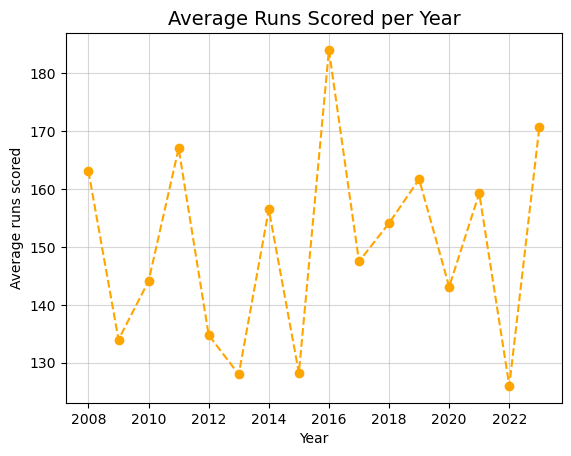

In [4]:
# Average runs scored per year
# lineplot
avg_runs=df.groupby("year")["runs_scored"].mean()
plt.plot(avg_runs.index,avg_runs.values,color="orange",linestyle="--",marker="o")
plt.title("Average Runs Scored per Year",fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average runs scored")
plt.grid(alpha=0.5)
plt.show()

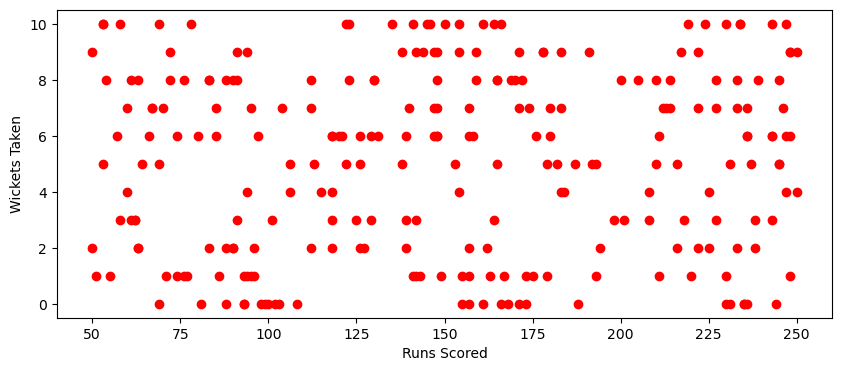

'\nThis \n'

In [5]:
# scatterplot
# runs_scored vs wickets_taken
plt.figure(figsize=(10,4)) # width, height
plt.scatter(df["runs_scored"],df["wickets_taken"],color="red")
plt.xlabel("Runs Scored")
plt.ylabel("Wickets Taken")
plt.show()
#--- 
'''
This 
'''

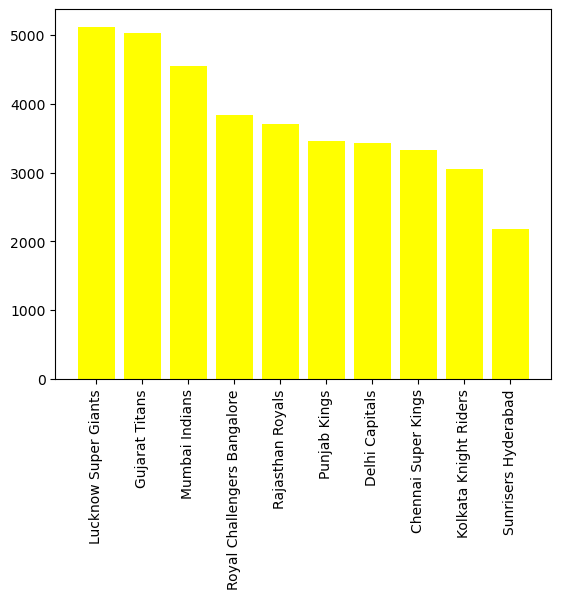

In [6]:
# bar chart : total runs scored by each team
total_runs=df.groupby("team")["runs_scored"].sum().sort_values(ascending=False)
plt.bar(total_runs.index,total_runs.values,color="yellow")
plt.xticks(rotation=90)
plt.show()


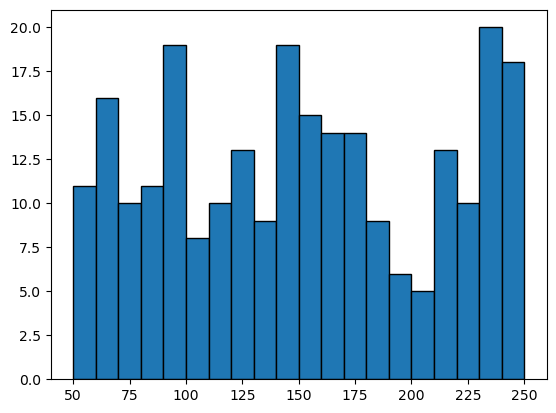

In [7]:
# histogram plot -- distribution of run score
plt.hist(df["runs_scored"],bins=20,edgecolor="black")
plt.show()

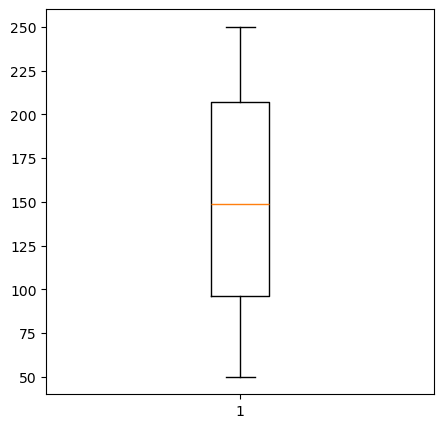

In [8]:
plt.figure(figsize=(5,5))
plt.boxplot(df["runs_scored"])
plt.show()


In [9]:
#----------------------seaborn --------------------------------

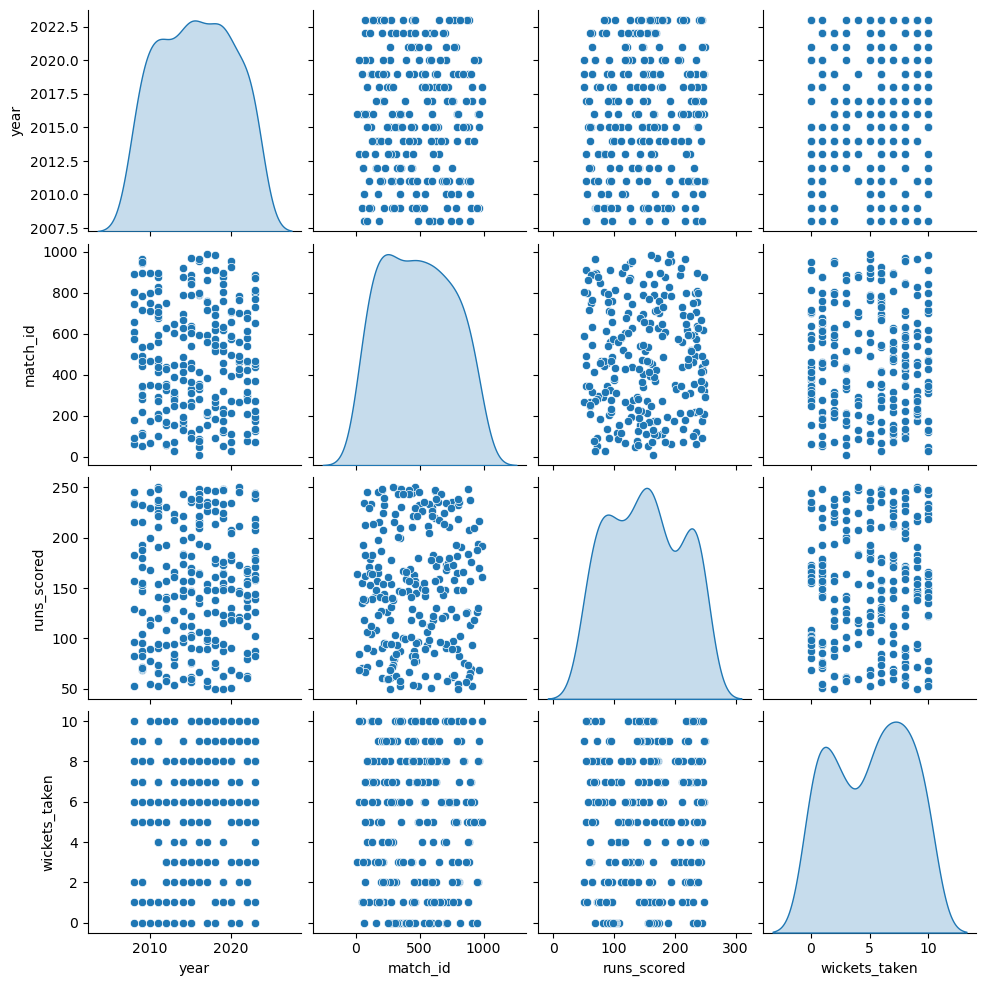

In [10]:

sns.pairplot(df,diag_kind="kde") # kernel density estimate i.e. kde plot
plt.show()

In [11]:
c=df.select_dtypes(["int","float"]).columns
df[c]

,year,match_id,runs_scored,wickets_taken
0,2017,755,236,6
1,2015,268,61,8
2,2009,965,69,5
3,2014,488,96,2
4,2023,439,244,0
...,...,...,...,...
245,2014,253,60,4
246,2014,586,112,8
247,2019,843,148,8
248,2022,616,86,1


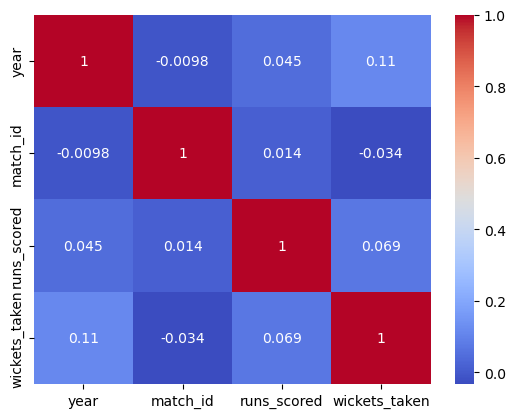

In [12]:
# heatmap -- correlation
sns.heatmap(df[c].corr(),annot=True,cmap="coolwarm")
plt.show()

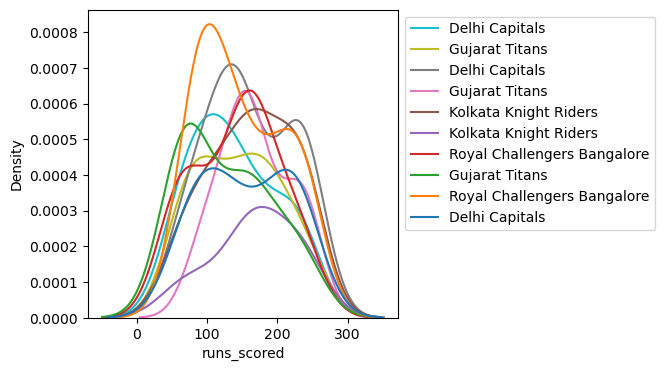

In [13]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df,x="runs_scored",hue="team")
plt.legend(df["team"],bbox_to_anchor=(1,1),loc=2)
plt.show()
#

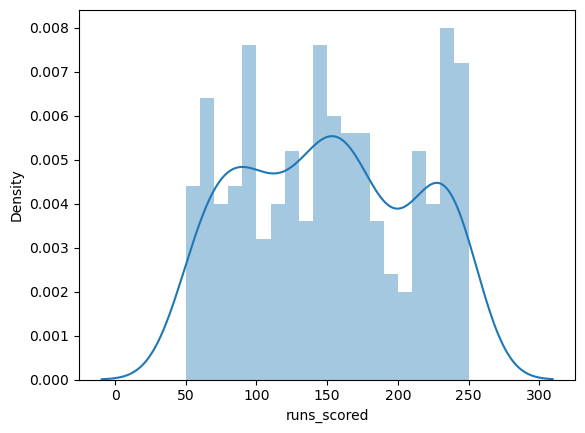

In [14]:
#sns.displot(data=df,x="runs_scored",bins=20,edgecolor="black")
sns.distplot(df["runs_scored"],bins=20)#,edgecolor="black")
plt.show()

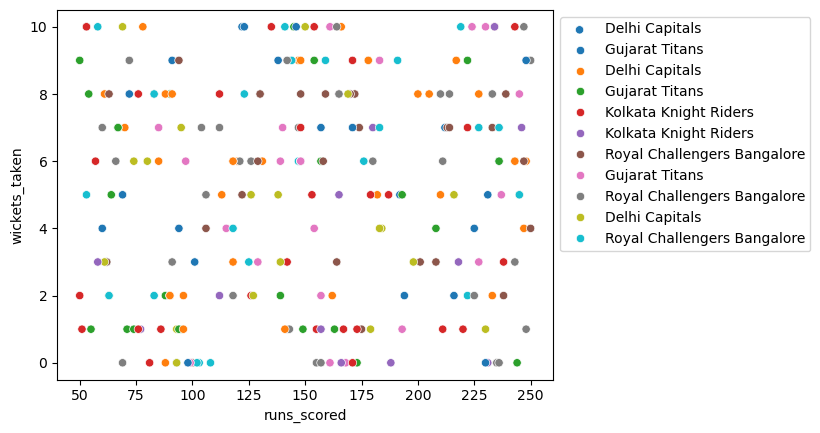

In [15]:
sns.scatterplot(data=df,x="runs_scored",y="wickets_taken",hue="team")
plt.legend(df["team"],bbox_to_anchor=(1,1),loc=2)
plt.show()

<Axes: xlabel='year', ylabel='runs_scored'>

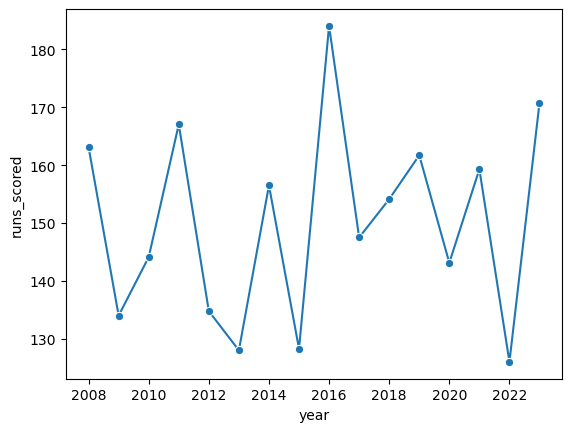

In [16]:
sns.lineplot(data=df.groupby("year")["runs_scored"].mean().reset_index(),x="year",y="runs_scored",marker="o")

In [17]:
df.groupby("year")["runs_scored"].mean()#.reset_index()

year
2008    163.100000
2009    134.000000
2010    144.111111
2011    167.045455
2012    134.769231
2013    128.000000
2014    156.500000
2015    128.250000
2016    184.058824
2017    147.500000
2018    154.125000
2019    161.714286
2020    143.133333
2021    159.300000
2022    126.000000
2023    170.736842
Name: runs_scored, dtype: float64

<Axes: xlabel='runs_scored', ylabel='team'>

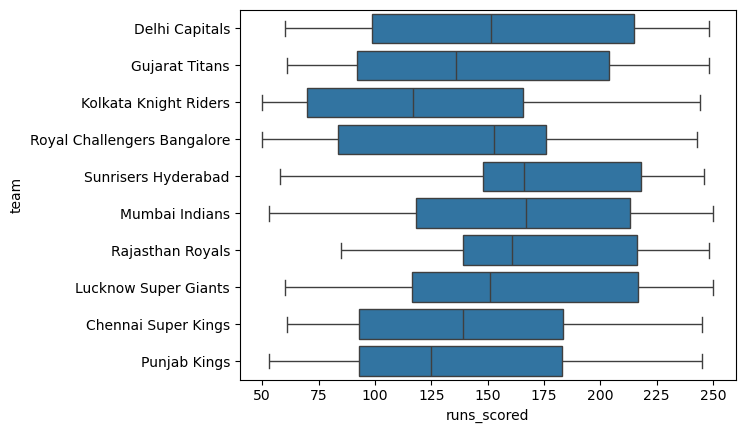

In [18]:
sns.boxplot(data=df,x="runs_scored",y="team")

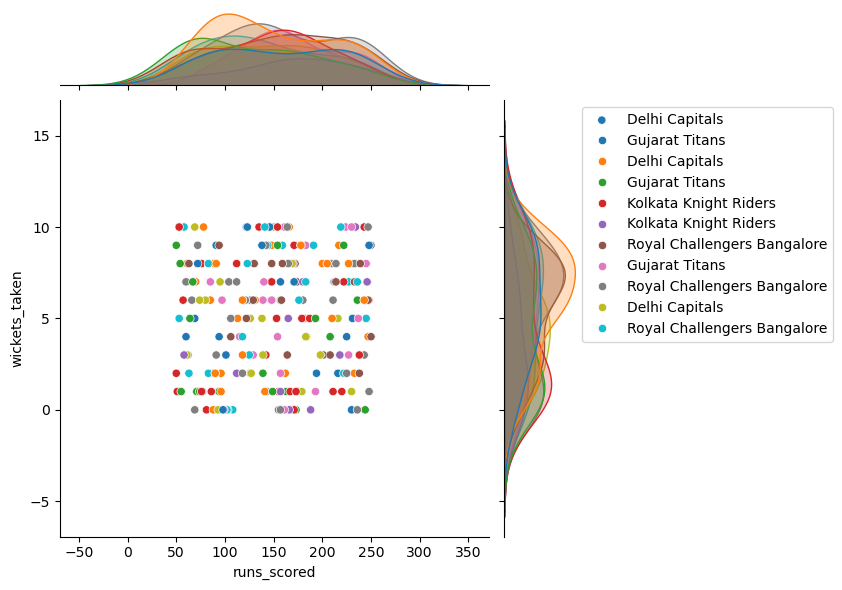

In [19]:
sns.jointplot(data=df,x="runs_scored",y="wickets_taken",hue="team")
plt.legend(df["team"],bbox_to_anchor=(1.2,1),loc=2)
plt.show()

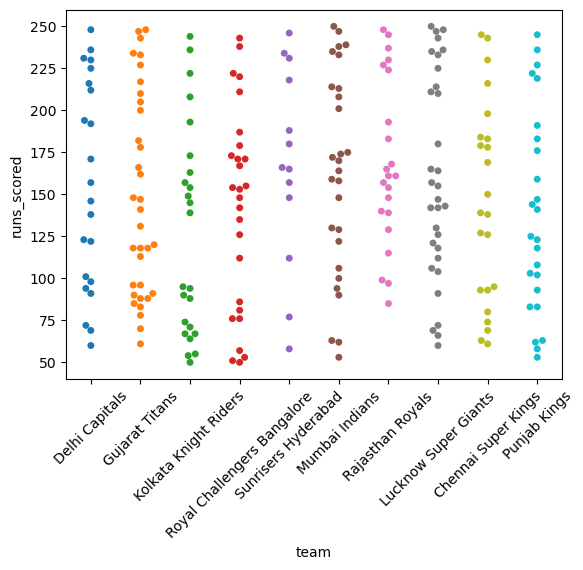

In [20]:
sns.swarmplot(data=df,x="team",y="runs_scored",hue="team")
plt.xticks(rotation=45)
plt.show()

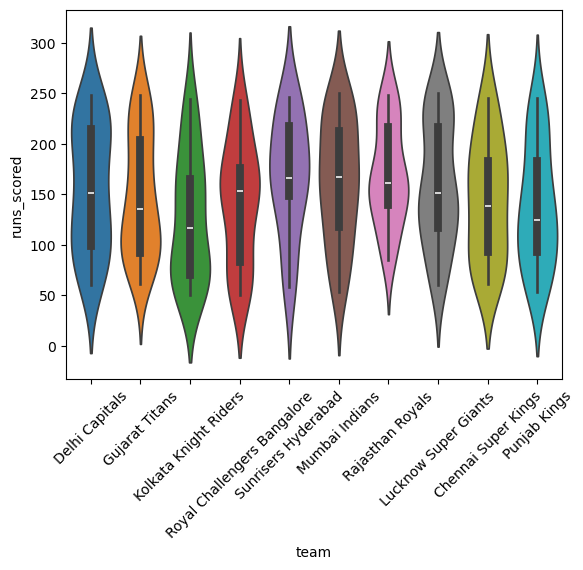

In [21]:
sns.violinplot(data=df,x="team",y="runs_scored",hue="team",legend=False)
plt.xticks(rotation=45)
plt.show()
plt.show()

In [22]:
# plotting 3D plot with the help of matplotlib

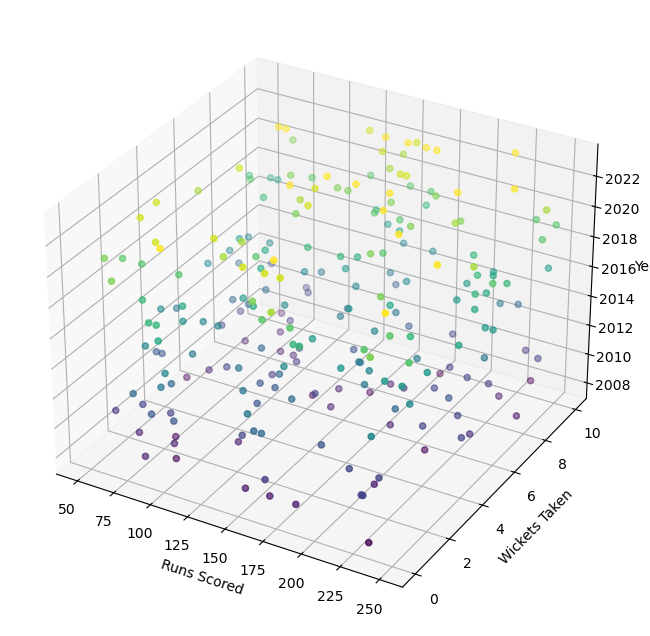

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
ax.scatter(df["runs_scored"],df["wickets_taken"],df["year"],c=df["year"])
ax.set_xlabel("Runs Scored")
ax.set_ylabel("Wickets Taken")
ax.set_zlabel("Year")
plt.show()
#mpl_toolkits.mplot3d enables 

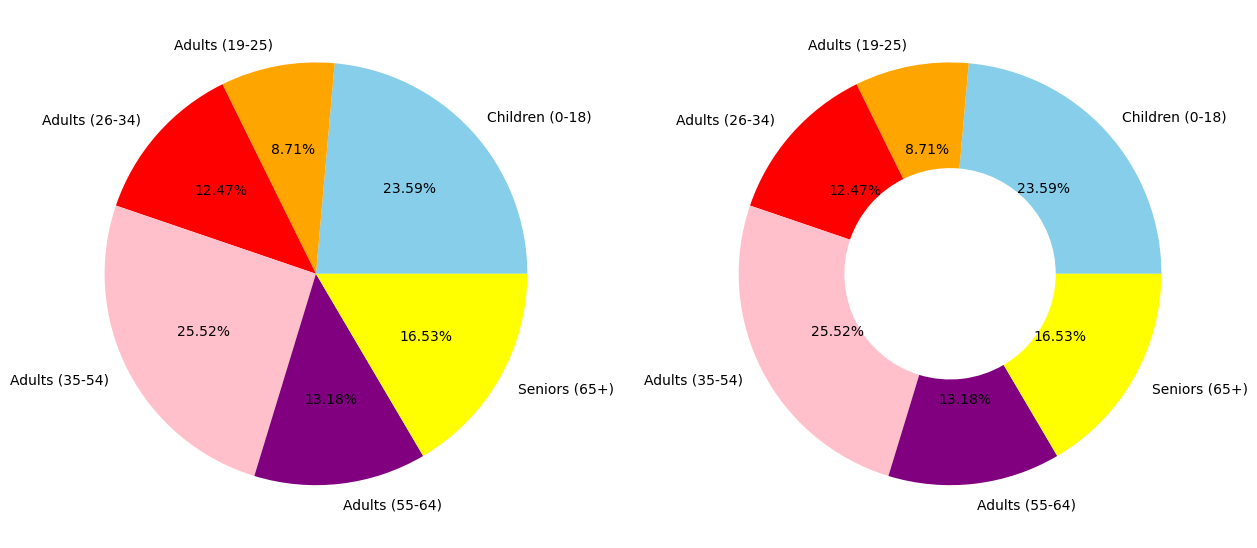

In [24]:
age_groups=["Children (0-18)","Adults (19-25)","Adults (26-34)","Adults (35-54)","Adults (55-64)","Seniors (65+)"]
populations=[75307800,27799100,39817700,81478600,42061700,52784400]
colors=["skyblue","orange","red","pink","purple","yellow"]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
ax1.pie(populations,labels=age_groups,autopct="%.2f%%",colors=colors)
ax2.pie(populations,labels=age_groups,autopct="%.2f%%",colors=colors,wedgeprops=dict(width=0.5))
plt.show()

In [ ]:
# PLOT LINEAR REGRESSION MODEL

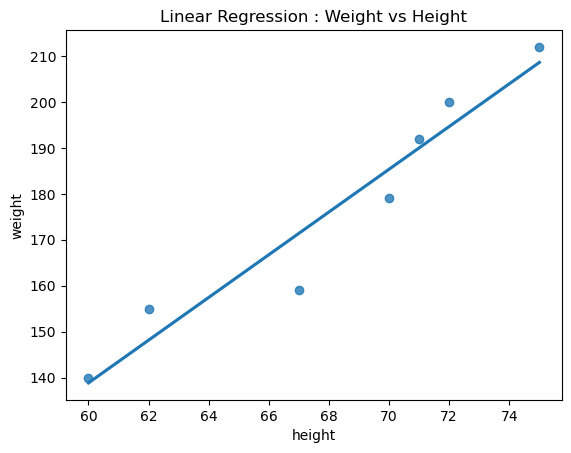

In [60]:
data={
    'weight':[140,155,159,179,192,200,212],
    'height':[60,62,67,70,71,72,75]
}
df=pd.DataFrame(data)
sns.regplot(data=df,x="height",y="weight",ci=None) # regression plot
plt.title("Linear Regression : Weight vs Height")
plt.show()
# 

In [56]:
df=pd.read_csv("data.csv")
df.head(2)

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8


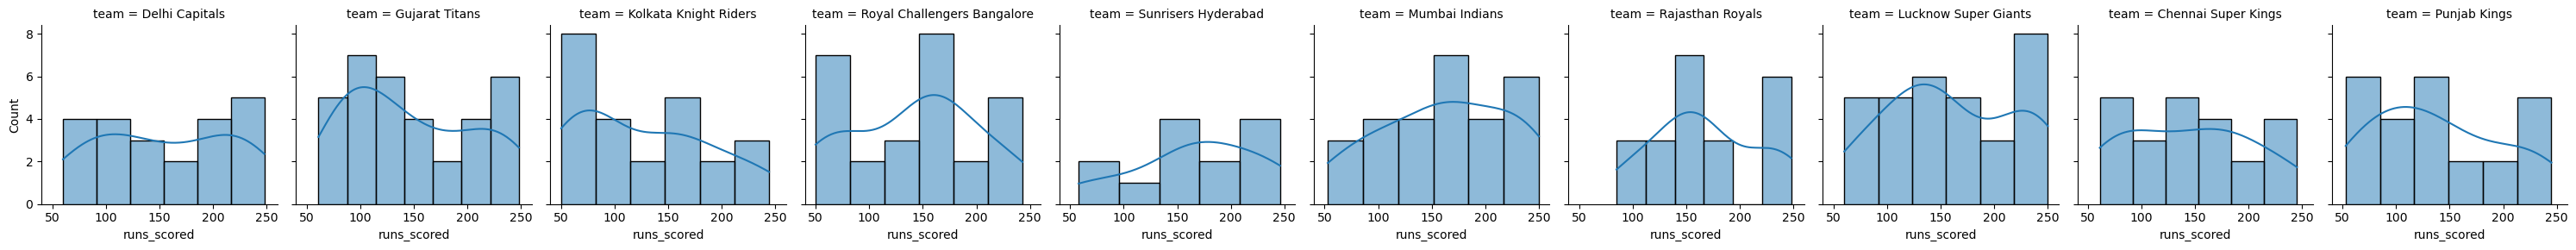

In [58]:
g=sns.FacetGrid(df,col="team")
g.map(sns.histplot,"runs_scored",kde=True)
#